# Finance & Analytics Club

Import necessary libraries

In [8]:
import pandas_datareader.data as pdr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm # for linear regression

Download historical data for required stocks

In [2]:
ticker = "AAPL"
ohlcv = pdr.get_data_yahoo(ticker,datetime.date.today()-datetime.timedelta(364),datetime.date.today())

In [3]:
ohlcv

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,191.679993,188.380005,191.639999,191.240005,27862000.0,188.769211
2019-04-02,194.460007,191.050003,191.089996,194.020004,22765700.0,191.513290
2019-04-03,196.500000,193.149994,193.250000,195.350006,23271800.0,192.826111
2019-04-04,196.369995,193.139999,194.789993,195.690002,19114300.0,193.161682
2019-04-05,197.100006,195.929993,196.449997,197.000000,18526600.0,194.454758
...,...,...,...,...,...,...
2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,224.369995
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004


### Function to calculate the slope of n consecutive points on a plot

In [4]:
def slope(ser,n):
    slopes = [i*0 for i in range(n-1)]
    for i in range(n,len(ser)+1):
        y = ser[i-n:i]
        x = np.array(range(n))
        y_scaled = (y - y.min())/(y.max() - y.min())
        x_scaled = (x - x.min())/(x.max() - x.min())
        x_scaled = sm.add_constant(x_scaled) # adds a constant in our linear equation to make the slope more visible
        model = sm.OLS(y_scaled,x_scaled)
        results = model.fit()
        slopes.append(results.params[-1]) # parameter/cefficient of our linear equation
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes)))) # convert slope to angle
    return np.array(slope_angle)

In [6]:
ohlcv['slope'] = slope(ohlcv['Adj Close'], 5)
ohlcv

,High,Low,Open,Close,Volume,Adj Close,slope
Date,,,,,,,
2019-04-01,191.679993,188.380005,191.639999,191.240005,27862000.0,188.769211,0.000000
2019-04-02,194.460007,191.050003,191.089996,194.020004,22765700.0,191.513290,0.000000
2019-04-03,196.500000,193.149994,193.250000,195.350006,23271800.0,192.826111,0.000000
2019-04-04,196.369995,193.139999,194.789993,195.690002,19114300.0,193.161682,0.000000
2019-04-05,197.100006,195.929993,196.449997,197.000000,18526600.0,194.454758,42.488770
...,...,...,...,...,...,...,...
2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,224.369995,-46.252840
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005,-19.556034
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004,18.765714


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c272375d0>],
      dtype=object)

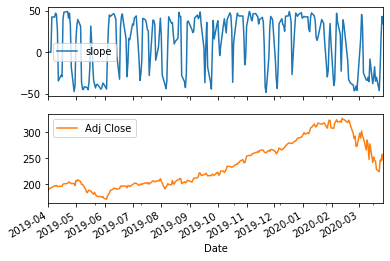

In [15]:
ohlcv.iloc[:,[-1,-2]].plot(subplots = True, layout = (2,1))